In [39]:
import pandas as pd
import scipy.stats, scipy.spatial
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from jupyterthemes import jtplot
jtplot.style()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [40]:
df = pd.read_csv('Speed Dating Data.csv', encoding="latin1")

In [19]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [20]:
df[df['iid'] == 6.0][['iid', 'pid', 'match', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]

,iid,pid,match,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
50,6,11.0,0,10.0,25.0,20.0,25.0,5.0,15.0
51,6,12.0,0,10.0,25.0,20.0,25.0,5.0,15.0
52,6,13.0,0,10.0,25.0,20.0,25.0,5.0,15.0
53,6,14.0,1,10.0,25.0,20.0,25.0,5.0,15.0
54,6,15.0,0,10.0,25.0,20.0,25.0,5.0,15.0
55,6,16.0,0,10.0,25.0,20.0,25.0,5.0,15.0
56,6,17.0,0,10.0,25.0,20.0,25.0,5.0,15.0
57,6,18.0,0,10.0,25.0,20.0,25.0,5.0,15.0
58,6,19.0,1,10.0,25.0,20.0,25.0,5.0,15.0
59,6,20.0,0,10.0,25.0,20.0,25.0,5.0,15.0


In [21]:
df[df['iid'] == 6.0][['iid', 'pid', 'match', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']]

,iid,pid,match,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2
50,6,11.0,0,10.26,25.64,20.51,23.08,2.56,17.95
51,6,12.0,0,10.26,25.64,20.51,23.08,2.56,17.95
52,6,13.0,0,10.26,25.64,20.51,23.08,2.56,17.95
53,6,14.0,1,10.26,25.64,20.51,23.08,2.56,17.95
54,6,15.0,0,10.26,25.64,20.51,23.08,2.56,17.95
55,6,16.0,0,10.26,25.64,20.51,23.08,2.56,17.95
56,6,17.0,0,10.26,25.64,20.51,23.08,2.56,17.95
57,6,18.0,0,10.26,25.64,20.51,23.08,2.56,17.95
58,6,19.0,1,10.26,25.64,20.51,23.08,2.56,17.95
59,6,20.0,0,10.26,25.64,20.51,23.08,2.56,17.95


In [22]:
df[df['iid'] == 12.0][['iid', 'pid', 'match', 'pf_o_att', 'attr_o']]

,iid,pid,match,pf_o_att,attr_o
110,12,1.0,0,15.00,7.0
111,12,2.0,0,45.00,8.0
112,12,3.0,0,35.00,9.0
113,12,4.0,0,20.00,8.0
114,12,5.0,0,20.00,8.0
115,12,6.0,0,10.00,6.0
116,12,7.0,0,15.00,6.0
117,12,8.0,1,9.09,8.0
118,12,9.0,1,20.00,10.0
119,12,10.0,0,15.00,1.0


In [23]:
df['id'].value_counts()

1.0     552
2.0     552
6.0     552
4.0     547
5.0     547
3.0     541
7.0     505
8.0     505
10.0    480
9.0     479
12.0    382
11.0    382
14.0    372
13.0    357
15.0    348
16.0    319
17.0    253
18.0    237
19.0    178
20.0    160
21.0     86
22.0     43
Name: id, dtype: int64

In [24]:
attr_df = df[['iid', 
              'attr1_1', 'attr1_2', 
              'sinc1_1', 'sinc1_2', 
              'intel1_1', 'intel1_2', 
              'fun1_1', 'fun1_2', 
              'amb1_1', 'amb1_2',
              'shar1_1', 'shar1_2']].groupby('iid').mean()

In [25]:
attr_df.shape

(551, 12)

In [26]:
clean_attr = attr_df.dropna()
clean_attr.shape

(477, 12)

In [27]:
clean_attr.corr()

,attr1_1,attr1_2,sinc1_1,sinc1_2,intel1_1,intel1_2,fun1_1,fun1_2,amb1_1,amb1_2,shar1_1,shar1_2
attr1_1,1.000000,0.771928,-0.422010,-0.378238,-0.343976,-0.406603,-0.146655,-0.180016,-0.474435,-0.417157,-0.440440,-0.378208
attr1_2,0.771928,1.000000,-0.373334,-0.527767,-0.158630,-0.471293,-0.052537,-0.249044,-0.391812,-0.519622,-0.425658,-0.518080
sinc1_1,-0.422010,-0.373334,1.000000,0.638192,-0.137212,-0.021925,-0.180644,0.017155,0.017660,0.031000,0.023005,0.148169
sinc1_2,-0.378238,-0.527767,0.638192,1.000000,-0.122533,0.011506,-0.060341,-0.041135,0.078924,0.110154,0.129000,0.113668
intel1_1,-0.343976,-0.158630,-0.137212,-0.122533,1.000000,0.568652,-0.132596,-0.017349,-0.045548,-0.063057,-0.086810,-0.034437
intel1_2,-0.406603,-0.471293,-0.021925,0.011506,0.568652,1.000000,-0.057710,-0.034451,0.140342,0.099775,0.110529,0.000524
fun1_1,-0.146655,-0.052537,-0.180644,-0.060341,-0.132596,-0.057710,1.000000,0.520411,-0.100744,-0.092259,-0.246319,-0.161797
fun1_2,-0.180016,-0.249044,0.017155,-0.041135,-0.017349,-0.034451,0.520411,1.000000,-0.053554,-0.152822,-0.113356,-0.149097
amb1_1,-0.474435,-0.391812,0.017660,0.078924,-0.045548,0.140342,-0.100744,-0.053554,1.000000,0.620748,0.148719,0.153132
amb1_2,-0.417157,-0.519622,0.031000,0.110154,-0.063057,0.099775,-0.092259,-0.152822,0.620748,1.000000,0.280322,0.264089


In [53]:
attr_before = clean_attr[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]
attr_after = clean_attr[['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']]
attr_after.head()

,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2
iid,,,,,,
1,19.44,16.67,13.89,22.22,11.11,16.67
2,18.92,18.92,21.62,27.03,5.41,8.11
4,24.14,13.79,20.69,27.59,10.34,3.45
5,15.79,13.16,18.42,15.79,15.79,21.05
6,10.26,25.64,20.51,23.08,2.56,17.95


In [54]:
attr_after.columns = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
attr_after.head()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,
1,19.44,16.67,13.89,22.22,11.11,16.67
2,18.92,18.92,21.62,27.03,5.41,8.11
4,24.14,13.79,20.69,27.59,10.34,3.45
5,15.79,13.16,18.42,15.79,15.79,21.05
6,10.26,25.64,20.51,23.08,2.56,17.95


In [55]:
attr_before.corrwith(attr_after)

attr1_1     0.771928
sinc1_1     0.638192
intel1_1    0.568652
fun1_1      0.520411
amb1_1      0.620748
shar1_1     0.568145
dtype: float64

In [28]:
vector_attr = pd.DataFrame(
    { 
        't1': clean_attr[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].values.tolist(), 
        't2': clean_attr[['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']].values.tolist()
    
    })

In [29]:
vector_attr.head()

,t1,t2
0,"[15.0, 20.0, 20.0, 15.0, 15.0, 15.0]","[19.44, 16.670000000000005, 13.89, 22.22, 11.1..."
1,"[45.0, 5.0, 25.0, 20.0, 0.0, 5.0]","[18.920000000000005, 18.920000000000005, 21.62..."
2,"[20.0, 20.0, 20.0, 20.0, 10.0, 10.0]","[24.139999999999997, 13.789999999999996, 20.69..."
3,"[20.0, 5.0, 25.0, 25.0, 10.0, 15.0]","[15.789999999999996, 13.16, 18.420000000000005..."
4,"[10.0, 25.0, 20.0, 25.0, 5.0, 15.0]","[10.260000000000002, 25.639999999999993, 20.50..."


In [30]:
def cosine_dist(row):
    return scipy.spatial.distance.cosine(row['t1'], row['t2'])

In [31]:
vector_attr['cosine_dist'] = vector_attr.apply(cosine_dist, axis=1)
vector_attr.head()

,t1,t2,cosine_dist
0,"[15.0, 20.0, 20.0, 15.0, 15.0, 15.0]","[19.44, 16.670000000000005, 13.89, 22.22, 11.1...",0.040048
1,"[45.0, 5.0, 25.0, 20.0, 0.0, 5.0]","[18.920000000000005, 18.920000000000005, 21.62...",0.171478
2,"[20.0, 20.0, 20.0, 20.0, 10.0, 10.0]","[24.139999999999997, 13.789999999999996, 20.69...",0.037878
3,"[20.0, 5.0, 25.0, 25.0, 10.0, 15.0]","[15.789999999999996, 13.16, 18.420000000000005...",0.073320
4,"[10.0, 25.0, 20.0, 25.0, 5.0, 15.0]","[10.260000000000002, 25.639999999999993, 20.50...",0.004656


In [32]:
vector_attr.head().values

array([[[15.0, 20.0, 20.0, 15.0, 15.0, 15.0],
        [19.44, 16.670000000000005, 13.89, 22.22, 11.11, 16.670000000000005],
        0.040048040970961374],
       [[45.0, 5.0, 25.0, 20.0, 0.0, 5.0],
        [18.920000000000005, 18.920000000000005, 21.62, 27.03, 5.409999999999999, 8.11],
        0.17147764209216176],
       [[20.0, 20.0, 20.0, 20.0, 10.0, 10.0],
        [24.139999999999997, 13.789999999999996, 20.69, 27.589999999999996, 10.340000000000002, 3.45],
        0.037878141848793234],
       [[20.0, 5.0, 25.0, 25.0, 10.0, 15.0],
        [15.789999999999996, 13.16, 18.420000000000005, 15.789999999999996, 15.789999999999996, 21.050000000000004],
        0.07332003948087162],
       [[10.0, 25.0, 20.0, 25.0, 5.0, 15.0],
        [10.260000000000002, 25.639999999999993, 20.509999999999998, 23.079999999999995, 2.5599999999999996, 17.949999999999996],
        0.00465614167138062]], dtype=object)

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


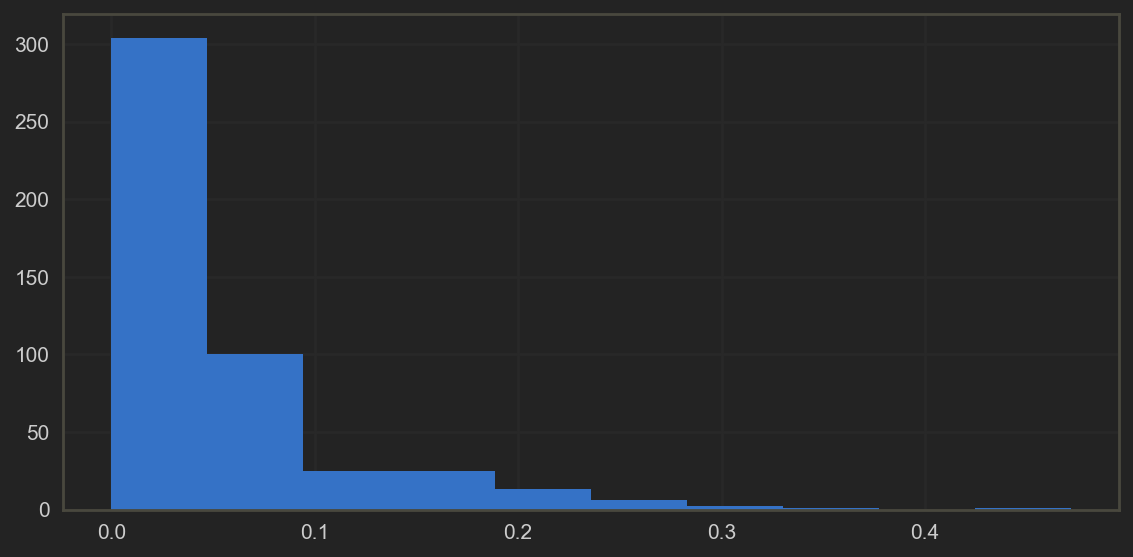

In [41]:
vector_attr['cosine_dist'].hist()

In [36]:
scipy.stats.ttest_1samp(vector_attr['cosine_dist'], 0)

Ttest_1sampResult(statistic=18.054069073991094, pvalue=6.9273213264215534e-56)

In [37]:
clean_attr

,attr1_1,attr1_2,sinc1_1,sinc1_2,intel1_1,intel1_2,fun1_1,fun1_2,amb1_1,amb1_2,shar1_1,shar1_2
iid,,,,,,,,,,,,
1,15.00,19.44,20.00,16.67,20.00,13.89,15.00,22.22,15.00,11.11,15.00,16.67
2,45.00,18.92,5.00,18.92,25.00,21.62,20.00,27.03,0.00,5.41,5.00,8.11
4,20.00,24.14,20.00,13.79,20.00,20.69,20.00,27.59,10.00,10.34,10.00,3.45
5,20.00,15.79,5.00,13.16,25.00,18.42,25.00,15.79,10.00,15.79,15.00,21.05
6,10.00,10.26,25.00,25.64,20.00,20.51,25.00,23.08,5.00,2.56,15.00,17.95
9,20.00,13.33,10.00,17.78,20.00,22.22,30.00,22.22,10.00,13.33,10.00,11.11
10,15.00,35.71,15.00,3.57,15.00,10.71,40.00,28.57,10.00,3.57,5.00,17.86
11,35.00,19.51,20.00,17.07,20.00,17.07,20.00,17.07,0.00,12.20,5.00,17.07
13,19.00,20.00,18.00,20.00,19.00,20.00,18.00,20.00,14.00,7.50,12.00,12.50
